<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/AKSHARE02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 配对交易定义
配对交易是一种基于数学分析交易策略，其盈利模式是通过两只证券的差价（spread）来获取，理论上可以做到和大盘走势完全无关。但其本质上是一种统计套利，也具有一定的风险性。

## 基本原理
配对交易的基本原理是，两个相似期货品种，其价格走势虽然在中途会有所偏离，但是最终都会趋于一致。配对交易就是利用这种价格偏离获取收益：当差价高于均值时，卖空涨得多的品种，差价小于均值时，买入涨得少的品种。具有这种关系的两个品种，在数学上称作协整性（cointegration），即它们之间的差价会围绕某一个均值来回摆动，这是配对交易策略可以盈利的基础。通俗点来讲，如果两个品种或者变量之间具有强协整性，那么不论它们中途怎么走的，它们的目的地总是一样的。

## 相关性分析
只有两个期货品种具有一定的相关性，那么对这两个品种做配对交易才有意义。那么首先就需要对各个品种做一个相关性分析。

In [1]:
!pip install akshare

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


首先第一步，需要获取市场上所有的主力连续合约代码，在此之前当然还是我们熟悉的各种导入三方库。

In [2]:
import time
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
import akshare as ak

开始用AKShare三方库获取当前期货市场上所有的期货连续合约代码，并整理数据。

In [3]:
df=ak.futures_display_main_sina()
df.set_index('symbol',inplace=True)

利用遍历循环批量获取期货连续合约的历史行情数据：

In [4]:
log=pd.DataFrame()
for contract_code in df.index[:20]: # 大批量数据调取会报错，只对列表中前几个期货品种进行分析
    time.sleep(1) # 尽量控制调取数据频率
    contract_name=df.loc[contract_code]['name']
    data=ak.futures_main_sina(symbol=contract_code)
    data['日期']=pd.to_datetime(data['日期'])
    data.set_index('日期',inplace=True)
    data.rename(columns={'收盘价':contract_name},inplace=True)
    log[contract_name]=data[contract_name]

将获取的行情数据进行处理，计算每日涨跌幅，并由此计算期货品种间的相关性：

In [5]:
data=log.copy() # 复制数据，保留原始数据以便后续使用
returns=data/data.shift(1)-1
corrs=returns.corr() # 计算相关性

将各个品种的期货相关性以热力图的形式呈现出来：

In [6]:
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

--2022-10-09 12:49:14--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  29.1MB/s    in 0.3s    

2022-10-09 12:49:15 (29.1 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]



In [7]:
!wget "https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip"
!unzip "simhei.zip"
!rm "simhei.zip"
!mv SimHei.ttf /usr/share/fonts/truetype/

--2022-10-09 12:49:15--  https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10546298 (10M) [application/octetstream]
Saving to: ‘simhei.zip’

simhei.zip          100%[===================>]  10.06M  30.6MB/s    in 0.3s    

2022-10-09 12:49:15 (30.6 MB/s) - ‘simhei.zip’ saved [10546298/10546298]

Archive:  simhei.zip
replace chinese.simhei.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: chinese.simhei.ttf      
  inflating: SimHei.ttf              
replace sharefonts.net.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sharefonts.net.txt      


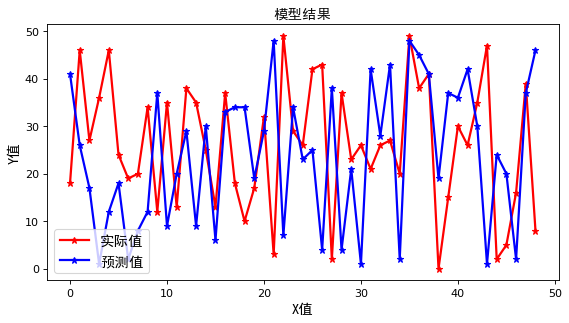

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/SimHei.ttf'
fontprop = fm.FontProperties(fname=path, size=13)

figure = plt.figure(figsize=(8,4),dpi=80)
ax = figure.add_axes((0.1, 0.1, 0.8, 0.8))

import random
X_test=[x for x in range(49)]
y_test=[random.randint(0,49) for x in range(49)]
test_predict=[random.randint(0,49) for x in range(49)]

plt.plot(X_test,y_test, 'c*-', color=(1, 0, 0, 1), linewidth=2.0, label='实际值')
plt.plot(X_test,test_predict, 'c*-', color=(0, 0, 1, 1), linewidth=2.0, label='预测值')

plt.title("模型结果",fontproperties=fontprop)
plt.xlabel("X值",fontproperties=fontprop)
plt.ylabel("Y值",fontproperties=fontprop)
plt.legend(loc = "lower left",prop=fontprop)
plt.show()

In [9]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline
#不是系统安装了字体就能在 Seaborn 和 Matplotlib 中使用，需要先更新 Matplotlib 的字体缓存
font_manager._rebuild()
#要使用字体，首先要知道字体名称，用以下命令可以查看 Matplotlib 的字体缓存中的字体名称
for font in font_manager.fontManager.ttflist:
    print(font)
#Seaborn 是基于 Matplotlib，所以设置 Seaborn 字体参数，就是设置 Matplotlib
#以下命令查看 Matplotlib 的默认字体
print(plt.rcParams["font.family"])
print(plt.rcParams['font.sans-serif'])

<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>
<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>
<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>
<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>
<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>
<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>
<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>
<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>
<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>
<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>
<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>
<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>
<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>
<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>
<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) ital

In [10]:
corrs

,PVC连续,棕榈油连续,豆二连续,豆粕连续,铁矿石连续,鸡蛋连续,塑料连续,聚丙烯连续,纤维板连续,胶合板连续,豆油连续,玉米连续,豆一连续,焦炭连续,焦煤连续,淀粉连续,乙二醇连续,粳米连续,苯乙烯连续,生猪连续
PVC连续,1.000000,0.313110,0.108327,0.175582,0.318452,0.049573,0.576311,0.515074,0.055328,0.102824,0.315610,0.127421,0.169786,0.366249,0.349350,-0.022503,0.404061,0.015236,0.358534,0.085929
棕榈油连续,0.313110,1.000000,0.300496,0.361618,0.158251,0.065910,0.331425,0.259587,0.018251,0.117735,0.808611,0.140469,0.367639,0.208655,0.193411,-0.015090,0.283113,0.062526,0.278207,0.144178
豆二连续,0.108327,0.300496,1.000000,0.393544,0.074711,0.077294,0.167233,0.127112,0.013442,0.031245,0.352546,0.133555,0.286678,0.073577,0.070998,-0.000274,0.246619,0.057881,0.205454,0.095915
豆粕连续,0.175582,0.361618,0.393544,1.000000,0.115364,0.118650,0.216481,0.171816,-0.011485,0.001402,0.431618,0.202814,0.430161,0.088688,0.075976,-0.020659,0.153063,0.024951,0.120368,0.079309
铁矿石连续,0.318452,0.158251,0.074711,0.115364,1.000000,0.030592,0.311295,0.343516,0.093538,0.092633,0.213774,0.158907,0.059924,0.551220,0.471868,0.011314,0.252399,0.024267,0.215785,-0.001450
鸡蛋连续,0.049573,0.065910,0.077294,0.118650,0.030592,1.000000,0.105555,0.077931,-0.013477,0.011577,0.065290,0.118736,0.070254,0.051042,0.034316,-0.027642,0.072297,0.068386,0.064758,0.017390
塑料连续,0.576311,0.331425,0.167233,0.216481,0.311295,0.105555,1.000000,0.783835,0.094547,0.024781,0.368398,0.202788,0.175014,0.279614,0.255448,-0.010695,0.547864,0.029041,0.485760,0.050962
聚丙烯连续,0.515074,0.259587,0.127112,0.171816,0.343516,0.077931,0.783835,1.000000,0.045279,-0.001440,0.294135,0.151878,0.086906,0.331560,0.267859,-0.011104,0.524963,0.044017,0.508410,0.061413
纤维板连续,0.055328,0.018251,0.013442,-0.011485,0.093538,-0.013477,0.094547,0.045279,1.000000,0.162034,0.087598,0.063404,0.001476,0.064530,0.048231,-0.000507,0.054623,-0.005842,-0.007370,-0.023819
胶合板连续,0.102824,0.117735,0.031245,0.001402,0.092633,0.011577,0.024781,-0.001440,0.162034,1.000000,0.066940,-0.001649,0.020878,0.071160,0.070252,0.165594,0.104881,0.155756,0.188746,0.452460


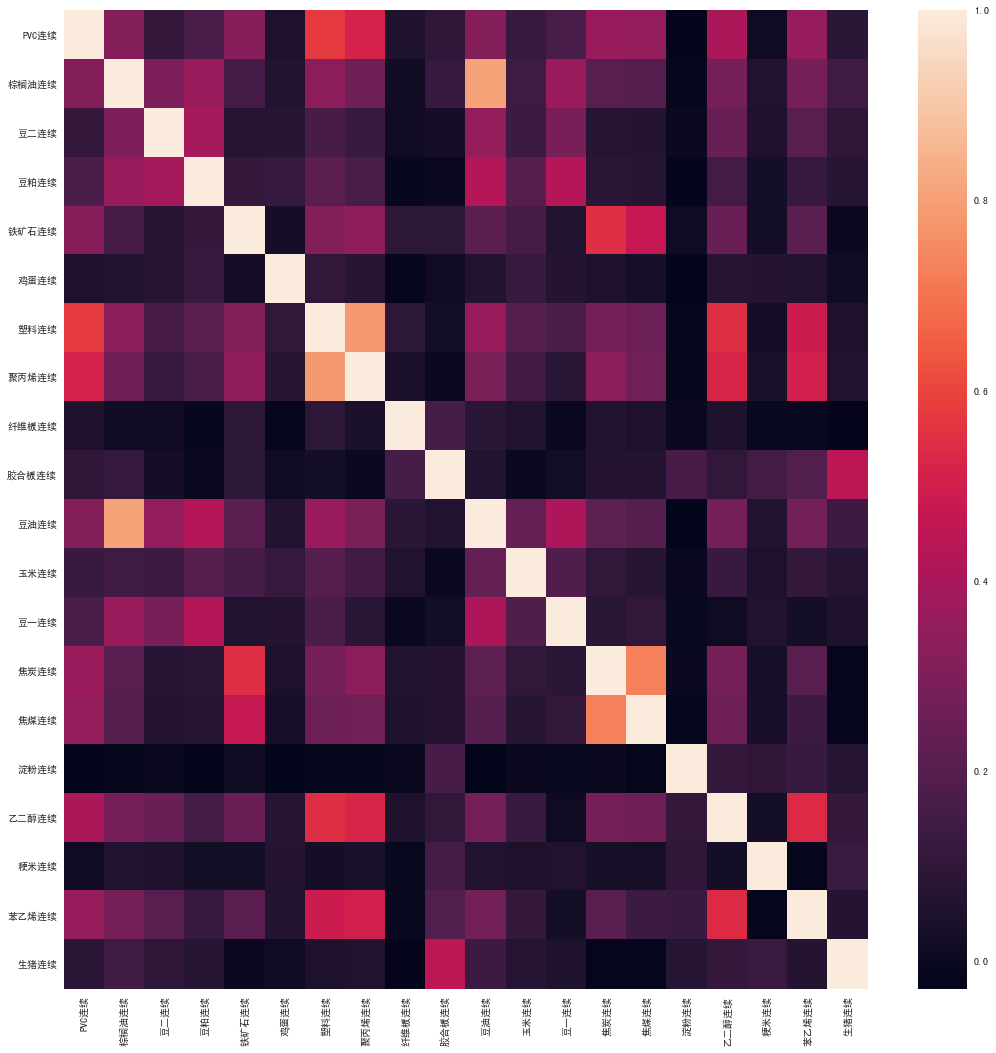

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
plt.style.use('seaborn')  

fontManager.addfont(path)
mpl.rc('font', family='SimHei')
# 引入下载的中文字体



#zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
#plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# 画坐标及坐标轴文本的时候引用

from matplotlib.legend import FontProperties
import seaborn as sns 
fig=plt.figure(figsize=(18,18)) 
ax = sns.heatmap(corrs)


In [12]:
print(corrs.index)


Index(['PVC连续', '棕榈油连续', '豆二连续', '豆粕连续', '铁矿石连续', '鸡蛋连续', '塑料连续', '聚丙烯连续',
       '纤维板连续', '胶合板连续', '豆油连续', '玉米连续', '豆一连续', '焦炭连续', '焦煤连续', '淀粉连续',
       '乙二醇连续', '粳米连续', '苯乙烯连续', '生猪连续'],
      dtype='object')


In [13]:
!pip install plotly
import plotly.graph_objects as go

fig=go.Figure(data=go.Heatmap(
    showlegend=True,
    name='相关性',
    x=corrs.columns.values,
    y=corrs.columns.values,
    z=corrs.values,
    type='heatmap'
)) 
fig.show()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
